# Введение

Данная работа направлена на объединение двух областей - машинного обучения и криптографии. Для этого будет рассмотрена довольна простая для понимания, но одновременно с этим весьма трудноразрешимая проблема - LPN (Learning Parity with Noise), встречающаяся при построении криптографических алгоритмов.

Практическое применение криптографии довольно очевидно - представим, что у нас есть собственный отель, в котором нам необходимо организовать индивидуальный и защищенный доступ гостей в их номера. Первое решение, которое приходит в голову - использование обыкновенных физических ключей. Однако у привычных для нас ключей есть существенный недостаток - их не так трудно потерять, что влечет за собой ощутимые затраты для отеля, поскольку если ключ был уникальным - придется менять замок на двери.

Не удовлетворившись данным решением, нам в голову может прийти другая мысль - использовать смарт-карты (в частности, карты с чипами RFID (radio-frequency identification), а также соответствующие им замки. Поскольку у нас есть много дверей и при этом мы очень хотим сэкономить деньги, мы выбираем очень слабые RFID-чипы.

Наша система должна работать следующим образом: в каждом замке и на каждой карте хранится секретный ключ, т.е. двоичный вектор (s = (1,0,1,0)), который на практике намного длиннее. При поднесении карты к замку, замок работает как считыватель, сканируя секретный ключ карты. Если секретные ключи карты и двери совпадают, то дверь открывается!

Но как все это организовать? Самый простой способ - поднести карту к замку, после чего замок "попросит" чип на карте отправить свой секретный ключ. Затем замок проверяет, совпадают ли оба секретных ключа, и если они совпадают - дверь откроется. Кажется, проблема решена, потому что если у нас нет правильной карты, т.е. секретный ключ на нашем чипе отличается от секретного ключа в дверном замке, то дверь не откроется.


# Проблематика

На самом деле, проблемы с защищенным доступ все-таки есть. Злоумышленник может сидеть в коридоре, не предпринимая никаких действий, которые могли бы показаться окружающим подозрительными. Но на самом деле злоумышленник может прослушивает RFID-трафик, то есть считывать данные связи между замком и чипом гостя. Если чип отправляет секретный ключ напрямую и без модификаций, то злоумышленник увидит его, сохранит, подделает карту, содержащую этот ключ, а затем сможет войти в комнату.

Поэтому просто использовать смарт-карты - плохая идея. Это работает только в том случае, если в мире нет злоумышленников, что, очевидно, крайне маловероятно. Необходимо повысить безопасность гостей. Идея заключается в следующем: чип каким-то образом должен доказать замку, что он обладает правильным секретным ключом, при этом не раскрывая его.

И именно в этот момент появляется криптография. Если ключ будет зашифрован, то злоумышленник увидит в поиске только мусор и не сможет восстановить сам ключ. Но, к сожалению, RFID-чип слишком слаб для шифрования чего-либо, потому что изначально мы очень хотели сэкономить деньги. Такой подход справедлив и для крупных компаний в реальном мире. У чипа почти нет вычислительной мощности, а также едва хватает места для хранения его секретного ключа. Поэтому нам нужно другое, более легкое решение. Одно из решений - использовать криптографический протокол, подобный протоколу HB. Этот протокол затрудняет извлечение ключа злоумышленником.

Стандартный протокол HB имеет ряд других уязвимостей и не должен использоваться на практике, однако он идеально подходит для объяснения базовых идей. Для обеспечения безопасности в реальном мире следует использовать более безопасные расширения этого протокола или другие, более усовершенствованные протоколы.


# HB Protocol

  Протокол HB - это протокол аутентификации с общим секретным ключом, разработанный для недорогих устройств с небольшой вычислительной мощностью, таких как метки RFID. Он имеет другие уязвимости и обычно не используется на практике.
        	Имеется считыватель R и тег T, то есть чип. Задача тега T состоит в том, чтобы подтвердить считывателю R, что он обладает тем же секретным ключом, при этом не раскрывая его. Для решения данной задачи считыватель несколько раз вызывает для T запросы, на которые правильно ответить может только тег, имеющий правильный секретный ключ. Уже известно, что спрашивать только секретный ключ небезопасно, так как это дает слишком много информации. Во избежание этого, в протоколе HB у тега T спрашивают только небольшие части секрета по одному биту за раз, пока R не удостовериться в наличии правильного секретного ключа у T.
        	Предположим, что секретные ключи R и T это тоже самое, что и s = (1,0,1,0). Теперь R посылает T случайный двоичный вектор a, например a = (1,0,1,1), и ожидает, что T отправит в ответ скалярное произведение b = <a,s>, то есть в данном примере это будет выглядеть следующим образом:


$$ <(1,0,1,1),(1,0,1,0)> = 1 *1 + 0 * 0 + 1 * 1 + 1 * 0 = 1 + 1 = 0 $$

Данная операция называет вызовом. Нужно отметить, что работа происходит с битовой арифметикой, а значит операция «+» является логической операцией исключающее «или» (XOR). А умножение такое же, как и в действительных числах.
R может сам вычислить скалярное произведение, так как ему известны a и s, и проверяет ответ T. Если ответ совпадает, R становится более уверенным в том, что T на самом деле имеет тот же самый секретный ключ. Но для полной уверенности такая процедура повторяется несколько раз.


![Цикл](./cycle.png)

Например, если у T нет правильного ключа, то очень маловероятно, что он будет успешным после достаточного количества раундов, поскольку единственный ответ будет правильным только с вероятностью 0,5. Следовательно, например, после 10 раундов вероятность успешной аутентификации составляет всего 1/1024, что меньше 0,1%.
Это уже больше походит на правду. Теперь T не раскрывает свой секрет сразу, вместо этого он дает некоторую информацию R, отвечая на вызовы. Но, к сожалению, это все еще небезопасно. Злоумышленник все еще может записать полную связь между R и T, а затем легко решить систему линейных уравнений, чтобы восстановить s. Это делается следующим образом: допустим, что злоумышленник записал для пар вызов/ответ следующую систему:


$$ a_1 = (1,0,1,1), b_1 = 0 $$
$$ a_2 = (0,1,1,1), b_2 = 1 $$
$$ a_3 = (0,0,1,0), b_3 = 1 $$
$$ a_4 = (0,0,0,1), b_4 = 0 $$


Злоумышленнику также известно, что:

<img src='./eq1.png' />

 где A — матрица, содержащая aᵢ в виде строк, а b — bᵢ. Система линейных уравнений, которую должен решить злоумышленник в данном случае будет иметь вид:

$$ \begin{pmatrix}
 1 & 0 & 1 & 1 \\ 
 0 & 1 & 1 & 1 \\ 
 0 & 0 & 1 & 0 \\ 
 0 & 0 & 0 & 1 \\ 
\end{pmatrix}  
s= 
\begin{pmatrix}
0\\ 
1\\ 
1\\ 
0
\end{pmatrix} $$

Таким образом, решение этой системы для s выдает секрет, то есть s = (1,0,1,0). Это можно сделать и другим методом, с помощью исключения Гаусса, если s намного больше, то есть имеет длину 1024 бита.


# Паритет обучения с проблемой шума

Существует одна небольшая, но чрезвычайно важная настройка, позволяющая обезопаситься от нашего злоумышленника -  распределение Бернулли. Распределение Бернулли моделирует случайный эксперимент произвольной природы, когда заранее известна вероятность успеха или неудачи. T просто добавляет к своим ответам случайный шум Бернулли. Вместо того, чтобы отправить <a,s> обратно R, он подбрасывает монету e, которая равна 1 с вероятностью p и 0 в противном случае, и отправляет обратно <a,s>+e читателю. Другими словами, с вероятностью 1-p тег отправляет <a,s> обратно в R и с вероятностью p переключает бит ответа с 0 на 1 или с 1 на 0. Предположим, что p <0,5. Надо отметить, что это не мешает злоумышленнику прослушивать общение между R и T и делать заметки, однако теперь им нужно решить следующую задачу:
$$ As \approx b $$
Это обозначение указывает на то, что каждое уравнение системы уравнений правильно только с вероятностью 1-p. Более формально можно записать как As+e=b, где e — вектор шума, в котором каждый компонент независимо равен 1 с вероятностью p и 0 с вероятностью 1-p.
Таким образом, злоумышленник должен решить зашумленную систему уравнений. Предполагается, что для постоянной частоты ошибок p проблему четности обучения с шумом (LPN) невозможно решить при достаточно большой длине секретного ключа. Это верно и тогда, когда злоумышленник может получить много больше уравнений.
        	Даже с добавлением этих ошибок R может выполнить свою работу, основываясь на том, знает ли T s или нет. Если T имеет правильное значение s, доля правильных ответов составляет примерно 1-p. Это означает, если p = 0,25, то протокол HB выполняется для 1000 итераций, T должен дать около 750 правильных ответов. Если T не имеет правильного s, он даст долю около 0,5 правильных ответов, то есть 500 из 1000 циклов выполнения протокола. Это позволяет R решить, имеет ли T правильный секрет или нет, и этот протокол по-прежнему имеет смысл для данного варианта использования.

# Решение LPN с помощью машинного обучения

Уже известно, что означает решение задачи LPN при заданной случайной бинарной матрице A и бинарном векторе b=As+e для восстановления s. Важное отметить, что теперь можно рассматривать каждую строку aᵢ матрицы A как образец, а соответствующее значение bᵢ=<aᵢ, s>+eᵢ в векторе b как метку.

Используя пример с секретной длиной 4 и шестью захваченными сообщениями, можно видеть, что каждая строка матрицы A состоит из четырех признаков, а запись в b является соответствующей меткой. Данный набор данных имеет размерность шесть.
Как и в обычных наборах данных, используемых в машинном обучении, метка bᵢ на самом деле напоминает скалярное произведение вектора признаков aᵢ и фиксированного секретного вектора s (некоторая истина), но с добавленным термином ошибки. Сейчас задача состоит в том, чтобы понять, как можно получить секрет s, когда на него будет наложен алгоритм машинного обучения для предсказания меток.
Если достаточно подробно изучить проблему, то тогда можно генерировать прогнозы для меток (скалярных произведений и истинности основания) для каждого вектора признаков так, как удобно. Если добавить вектор a=(1,0,0,0), то можно получить удачное предположение первого бита s
$$ b = <(1,0,0,0), s> = 1 * s_1 + 0 * s_2 + 0 * s_3 + 0 * s_4 = s_1 $$
Если повторить тоже самое с векторами (0, 1, 0, 0), (0, 0, 1, 0) и (0, 0, 0, 1), то можно получить все биты секретного ключа. Таким образом, можно решить проблему LPN с помощью машинного обучения.
Проблема LPN очень универсальна. Ее можно использовать для построения шифрования, шифрования на основе идентичности, аутентификации пользователей, неочевидным обменом информации между двумя лицами или процессами, кодов аутентификации сообщений и, возможно, других конструкций. Кроме того, в отличие от проблемы факторизации, проблему LPN нельзя легко решить с помощью квантовых компьютеров. В сочетании с его легкостью он является хорошим кандидатом для создания постквантовых безопасных алгоритмов.


# Эксперименты :-)

In [68]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math
import pandas as pd
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [69]:
class LPNOracle:
    def __init__(self, secret, error_rate):
        self.secret = secret
        self.dimension = len(secret)
        self.error_rate = error_rate
    def sample(self, n_amount):
        # Матрица кодов.
        A = np.random.randint(0, 2, size=(n_amount, self.dimension))
        # Ошибка Бернулли.
        e = np.random.binomial(1, self.error_rate, n_amount)
        # Результирующий вектор.
        b = np.mod(A @ self.secret + e, 2)
        return A, b

Нижеописанная функция представляет из себя тест сгенерированного ключа.

In [70]:
def test_hypothesis(candidate_secret, m, p, dim):
    t = m*p + math.sqrt(m*dim)
    hamming_weight = np.mod(A @ s_candidate + b, 2).sum()
    return hamming_weight <= t

Генерация ключа:

In [47]:
def generate_candidate(num_samples, dim):
    dt = RandomForestClassifier(n_estimators=math.ceil(num_samples/50), random_state=123)
    dt.fit(A, b)
    return dt.predict(np.eye(dim))

Для всех вероятностей ошибок 0.1 <= p < 0.5 с шагом 0.05 проверим количество необходимых для угадывания ключа попыток.
При этом будем использовать разное количество исходных обучающих вектор и матриц.

In [48]:
dim = 8
data = {'error_rate':[], 'samples':[], 'count': [], 'total_count': []}  
df = pd.DataFrame(data)

for error_perc in range(10, 50, 5):
    error_rate = error_perc / 100
    num_of_samples = math.floor(4*dim/(0.5 - error_rate)/(0.5 - error_rate))
    for m in range(math.floor(0.1*num_of_samples), 2*num_of_samples, math.floor(0.1*num_of_samples)):
        secret_key = np.random.randint(0, 2, dim)
        lpn = LPNOracle(secret_key, error_rate)
        count = 0
        is_correct = True
        while(True):
            A, b = lpn.sample(m)
            s_candidate = generate_candidate(m, dim)
            check = test_hypothesis(s_candidate, m, error_rate, dim)
            if check:
                break
            if count >= m*5:
                print("FAIL!!! Num of samples:", m, ', error_rate:', error_rate)
                is_correct = False
                break
            count = count+1
        df.loc[len(df.index)] = [error_rate, m, count, m*10]
        if is_correct:
            print("SUCCESS!!! Try #", count, ', Num of samples:', m, ', error_rate:', error_rate, 'KEYS:', s_candidate, secret_key)

data

SUCCESS!!! Try # 0 , Num of samples: 20 , error_rate: 0.1 KEYS: [0 0 1 0 0 0 0 0] [0 0 0 1 0 1 0 0]
SUCCESS!!! Try # 2 , Num of samples: 40 , error_rate: 0.1 KEYS: [1 0 0 0 1 1 1 0] [1 1 0 1 0 0 1 1]
SUCCESS!!! Try # 0 , Num of samples: 60 , error_rate: 0.1 KEYS: [0 0 0 0 0 1 0 0] [1 0 0 1 0 1 0 0]
SUCCESS!!! Try # 4 , Num of samples: 80 , error_rate: 0.1 KEYS: [1 1 0 0 0 0 0 0] [1 1 0 0 0 0 0 0]
SUCCESS!!! Try # 69 , Num of samples: 100 , error_rate: 0.1 KEYS: [0 1 0 1 1 0 0 0] [0 1 1 1 1 0 1 0]
SUCCESS!!! Try # 0 , Num of samples: 120 , error_rate: 0.1 KEYS: [1 1 1 0 0 0 1 0] [1 1 1 0 0 0 1 0]
SUCCESS!!! Try # 42 , Num of samples: 140 , error_rate: 0.1 KEYS: [0 0 0 1 1 0 1 1] [0 0 0 1 1 0 1 1]
SUCCESS!!! Try # 12 , Num of samples: 160 , error_rate: 0.1 KEYS: [0 0 1 1 0 1 1 0] [0 0 1 1 0 1 1 0]
SUCCESS!!! Try # 13 , Num of samples: 180 , error_rate: 0.1 KEYS: [1 0 0 1 0 0 0 1] [1 0 0 1 0 0 0 1]
SUCCESS!!! Try # 11 , Num of samples: 200 , error_rate: 0.1 KEYS: [0 1 0 0 1 0 0 1] [0 1 0 

SUCCESS!!! Try # 28 , Num of samples: 400 , error_rate: 0.3 KEYS: [1 1 1 0 0 0 0 0] [1 1 1 0 0 0 0 0]
SUCCESS!!! Try # 4 , Num of samples: 480 , error_rate: 0.3 KEYS: [0 1 1 0 0 1 0 0] [0 1 1 0 0 1 0 0]
SUCCESS!!! Try # 0 , Num of samples: 560 , error_rate: 0.3 KEYS: [0 1 0 0 0 1 0 0] [0 1 0 0 0 1 0 0]
SUCCESS!!! Try # 39 , Num of samples: 640 , error_rate: 0.3 KEYS: [0 1 1 0 1 0 1 1] [0 1 1 0 1 0 1 1]
SUCCESS!!! Try # 22 , Num of samples: 720 , error_rate: 0.3 KEYS: [0 1 1 0 0 0 0 0] [0 1 1 0 0 0 0 0]
SUCCESS!!! Try # 9 , Num of samples: 800 , error_rate: 0.3 KEYS: [0 0 0 0 0 0 1 1] [0 0 0 0 0 0 1 1]
SUCCESS!!! Try # 3 , Num of samples: 880 , error_rate: 0.3 KEYS: [0 1 0 0 0 0 1 0] [0 1 0 0 0 0 1 0]
SUCCESS!!! Try # 0 , Num of samples: 960 , error_rate: 0.3 KEYS: [1 1 0 0 0 1 0 0] [1 1 0 0 0 1 0 0]
SUCCESS!!! Try # 2 , Num of samples: 1040 , error_rate: 0.3 KEYS: [1 1 1 1 0 1 0 1] [1 1 1 1 0 1 0 1]
SUCCESS!!! Try # 4 , Num of samples: 1120 , error_rate: 0.3 KEYS: [0 0 0 0 1 0 1 1] [0 

{'error_rate': [], 'samples': [], 'count': [], 'total_count': []}

Масштабируем полученный датасет

In [59]:
scaler = preprocessing.MinMaxScaler()
dfCopy = df.copy()

number_cols = dfCopy.select_dtypes(exclude=['object'])

for col_name in number_cols.columns:
    dfCopy[col_name] = scaler.fit_transform(dfCopy[[col_name]])

dfCopy

,error_rate,samples,count,total_count
0,0.0,0.000000,0.000000,0.000000
1,0.0,0.000823,0.021978,0.000823
2,0.0,0.001646,0.000000,0.001646
3,0.0,0.002469,0.043956,0.002469
4,0.0,0.003292,0.758242,0.003292
...,...,...,...,...
151,1.0,0.789300,0.000000,0.789300
152,1.0,0.841975,0.043956,0.841975
153,1.0,0.894650,0.021978,0.894650
154,1.0,0.947325,0.000000,0.947325


In [60]:
dfs = dict(tuple(dfCopy.groupby('error_rate')))

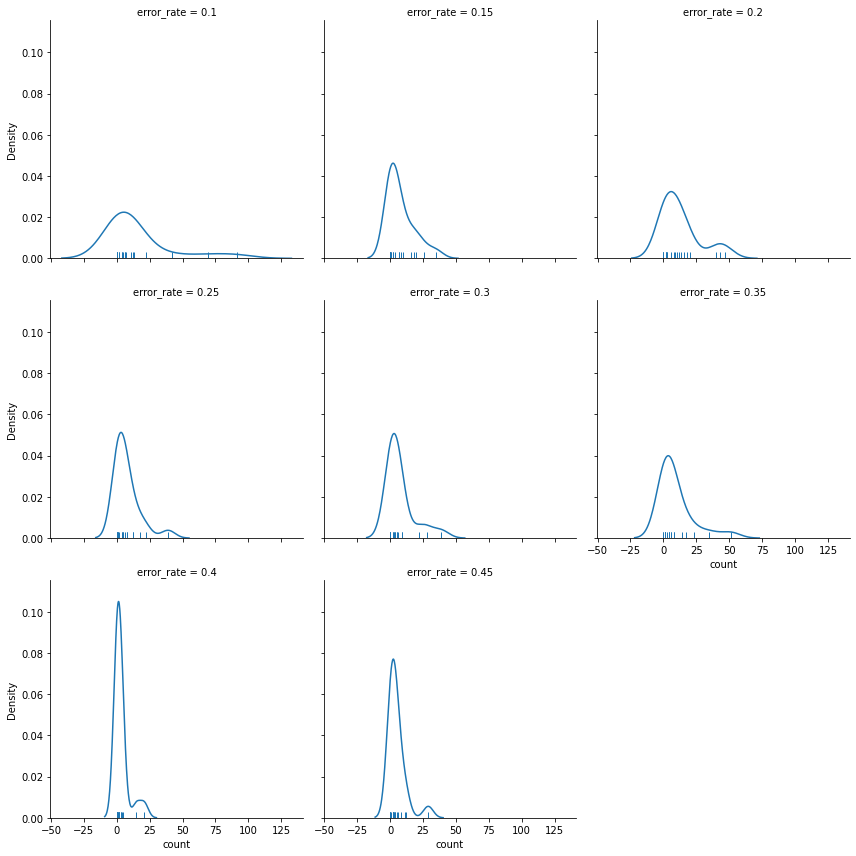

In [72]:
import seaborn as sns

g = sns.FacetGrid(df, col='error_rate',col_wrap=3, height=4)
g = (g.map(sns.distplot, "count", hist=False, rug=True))

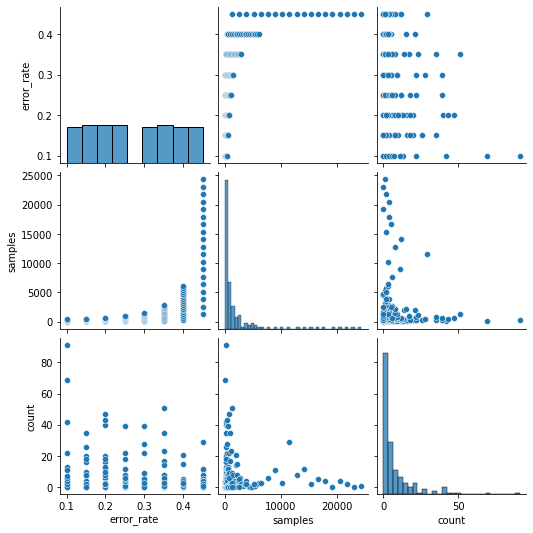

In [73]:
sns.pairplot(df[["error_rate","samples","count"]])

# Список используемой литературы

1. [N. Hopper and M. Blum, Secure human identification protocols (2001)](https://link.springer.com/chapter/10.1007/3-540-45682-1_4)
2. [ R. Kübler, Time-Memory Trade-Offs for the Learning Parity with Noise Problem (2018)](https://hss-opus.ub.ruhr-uni-bochum.de/opus4/frontdoor/deliver/index/docId/5940/file/diss.pdf)